In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [4]:
# Gaussian Datasets
mu, sigma = 1, 0.5;
size = 300;
ds1 = np.random.normal(mu, sigma, size);
ds2 = sigma*np.random.randn(size) + mu;

In [34]:
# Toy Sklearn Datasets for Classification
ds3, label3 = datasets.load_iris(return_X_y=True) # 150*4 over 3 classes
ds4, label4 = datasets.load_digits(return_X_y=True) # 1797*64 over 10 classes
ds5, label5 = datasets.load_wine(return_X_y=True) # 178*13 over 3 classes (slightly unbalanced)
ds6, label6 = datasets.load_breast_cancer(return_X_y=True) # 569*30 over 2 classes (slightly unbalanced)


In [61]:
# Generator for Classification
ds7, label7 = datasets.make_blobs(n_samples=300, n_features=4, centers=4, cluster_std=2)
# make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, 
#                     n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, 
#                     hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
ds8, label8 = datasets.make_classification(n_samples=300, n_features=30, n_informative=10, n_classes=2)

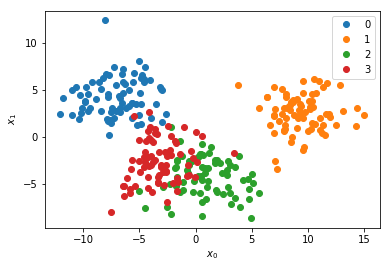

In [62]:
# Visualise 
from sklearn.decomposition import PCA

data_reduced = PCA(n_components=2).fit_transform(ds7, label7)

for label in np.unique(label7):
    idx = np.where(label7 == label)[0]
    plt.plot(data_reduced[idx,0], data_reduced[idx,1], 'o', label=label)
    
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend();

In [ ]:
# Sampling
def random_sampling(X, y, n_samples):
    """Extract n_samples from X and y."""
    from sklearn.model_selection import StratifiedShuffleSplit
    
    train_idx, test_idx = next(StratifiedShuffleSplit(n_splits=1, test_size=n_samples).split(X, y))
    return X[train_idx, :], y[train_idx], X[test_idx,:], y[test_idx]